Deep Learning Project 1 - Tea Leaf disease Classification ( Accuracy achieved : 86% )

Group Members : Saurabh Kumar Verma ( 2019ucs0033 )
                Abhishek Maurya     ( 2019uee0134 )
                Anshul Sharma       ( 2019ucs0074 )
                Balwant Singh Yadav ( 2019uch0009 )

Dataset Link : https://drive.google.com/drive/folders/1DrvX1WRXr6UjUOk9riWd5hEIXW9xszST?usp=sharing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

Path of the dataset

In [3]:
path="/content/drive/MyDrive/Tea/tea sickness dataset"
directory=pathlib.Path(path)

Names and number of the classes present and number of images in each class

In [13]:
classlist=[]
for num in os.walk(path):
    subdirectory=num[0]
    lis=str(subdirectory).split('/')
    if(len(lis)>4):
        cls=(lis[len(lis)-1])
        classlist.append(cls)
classlist.pop(0)
num_classes=len(classlist)
print(len(classlist))
print(classlist)
print('\n')
for cls in classlist:
    cnt=len(list(directory.glob(f'{cls}/*.jpg')))
    print(f"Number of images in {cls}: is",cnt)

8
['gray light', 'algal leaf', 'brown blight', 'bird eye spot', 'healthy', 'red leaf spot', 'Anthracnose', 'white spot']


Number of images in gray light: is 100
Number of images in algal leaf: is 113
Number of images in brown blight: is 113
Number of images in bird eye spot: is 100
Number of images in healthy: is 74
Number of images in red leaf spot: is 143
Number of images in Anthracnose: is 100
Number of images in white spot: is 142


Defining parameters and load data for training

In [7]:
train=128
test=128
height=224
width=224
split=0.2

train_dataset= tf.keras.utils.image_dataset_from_directory(directory,validation_split=split,subset="training",
seed=123,image_size=(height,width),batch_size=train)

Found 885 files belonging to 8 classes.
Using 708 files for training.


Load data for testing

In [9]:
test_dataset=tf.keras.utils.image_dataset_from_directory(directory,validation_split=split,subset="validation",                                                     
seed=123,image_size=(height,width),batch_size=test)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


Display Sample dataset

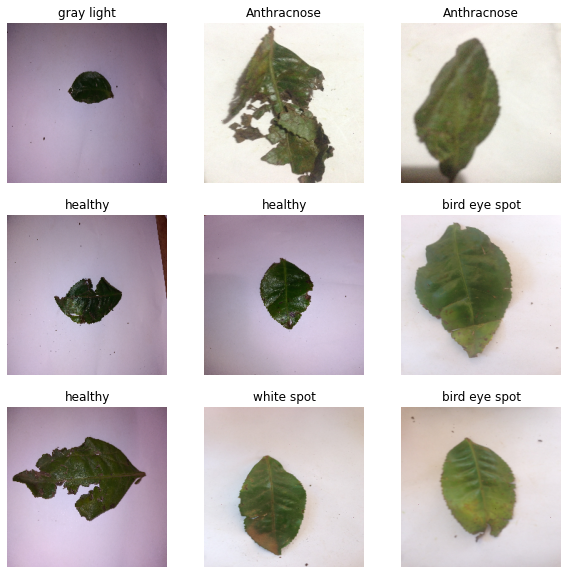

In [10]:
plt.figure(figsize=(10,10))
for image,label in train_dataset.take(1):
    for x in range(9):
        y=plt.subplot(3,3,x+1)
        plt.imshow(image[x].numpy().astype("uint8"))
        plt.title(classlist[label[x]])
        plt.axis("off")

Preprocessing and Data Augmentation

In [12]:
train_datset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

aug=keras.Sequential([layers.RandomFlip("horizontal",input_shape=(height,width,3)),layers.RandomFlip("vertical"),
layers.RandomRotation(0.2),layers.RandomZoom(0.2),])

Model Architecture

In [14]:
model=Sequential([
    aug,
    layers.Rescaling(1/255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

Compile and Display Model

In [15]:
alpha=0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=alpha),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                  

Run Model

In [ ]:
history=model.fit(train_dataset,validation_data=test_dataset,epochs=320,verbose=0)

Comparing Traing and testing accuracy and loss

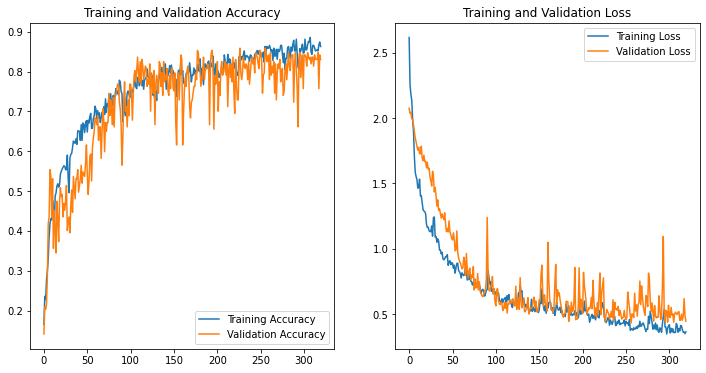

In [ ]:
accuracy=history.history['accuracy']
validation_accuracy= history.history['val_accuracy']
loss=history.history['loss']
validation_loss = history.history['val_loss']

epochs_range= range(320)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs_range,accuracy,label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prediction

Predictions:
 [7 7 0 7 2 7 2 1 1 4 2 3 7 6 0 1 4 3 3 4 3 0 6 3 7 4 7 1 4 4 3 5 3 2 6 4 3
 1 4 4 7 7 6 2 0 2 6 3 1 3 6 2 3 4 4 3 7 1 5 0 6 4 2 4 1 6 4 6 7 5 3 7 3 2
 2 7 1 3 2 2 2 6 6 0 0 1 1 4 7 0 2 4 5 3 2 6 4 7 7 7 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 7 2 4 7 3 4]
Labels:
 [3 7 2 7 0 7 2 1 1 4 0 7 7 6 0 1 2 3 3 4 3 0 6 3 7 4 1 1 0 4 7 5 3 0 6 4 3
 7 4 4 7 7 6 2 0 4 6 3 1 3 6 2 7 4 4 3 7 1 5 0 6 4 0 4 1 6 4 6 3 5 3 7 3 2
 2 7 1 3 2 0 4 6 6 0 0 1 1 4 7 0 0 4 5 3 2 6 4 7 7 3 2 6 0 7 4 1 3 3 5 6 5
 5 7 6 1 3 2 3 7 0 3 4 3 0 4 7 3 0]

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        18
           1       0.92      0.92      0.92        13
           2       0.50      0.82      0.62        11
           3       0.86      0.83      0.84        23
           4       0.86      0.90      0.88        20
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        15
           7       0.

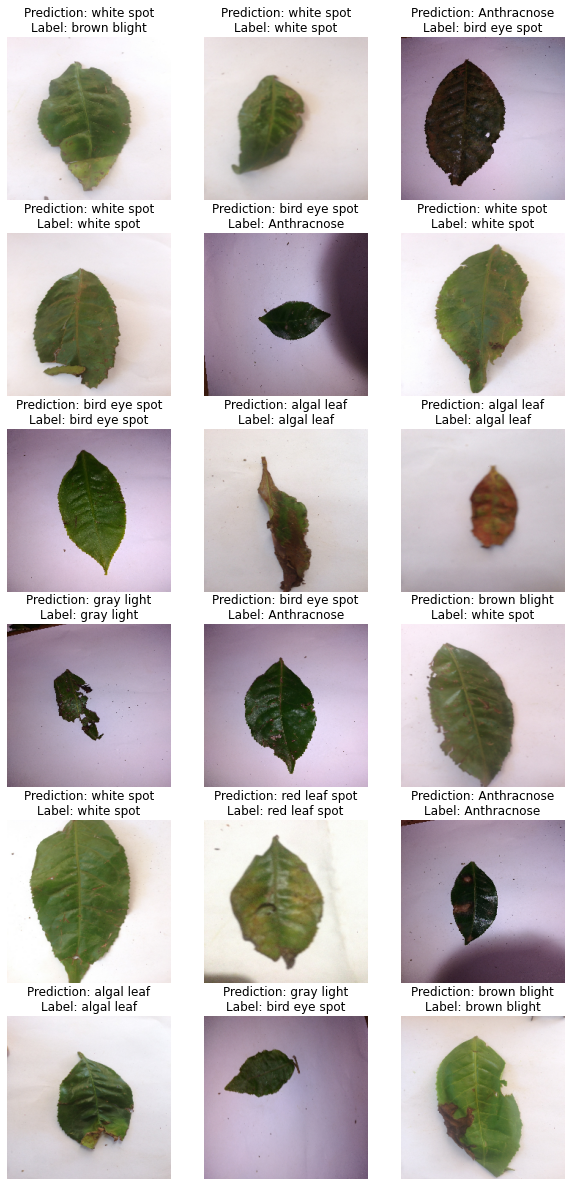

In [ ]:
imgbatch,labelbatch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(imgbatch)
predictions_list=[]
for x in predictions:
    p=np.argmax(x)
    predictions_list.append(p)

predictions_list= np.array(predictions_list)
print('Predictions:\n',predictions_list)
print('Labels:\n', labelbatch)
print(classification_report(labelbatch,predictions_list))

plt.figure(figsize=(10,21))
for x in range(18):
    xx=plt.subplot(6,3,x+1)
    plt.imshow(imgbatch[x].astype("uint8"))
    plt.title("Prediction: "+classlist[predictions_list[x]]+"\nLabel: "+classlist[labelbatch[x]])
    plt.axis("off")

Accuracy

In [ ]:
hisdf=pd.DataFrame(history.history)
hisdf.to_csv("history.csv")
hisdf.tail()

,loss,accuracy,val_loss,val_accuracy
315,0.380663,0.854520,0.453879,0.830508
316,0.362537,0.851695,0.489364,0.847458
317,0.364259,0.867232,0.618665,0.757062
318,0.351204,0.874294,0.490050,0.841808
319,0.364264,0.862994,0.446584,0.830508
